In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [25]:
def System(r,t):
    theta, theta_p, theta_pp = r
    tt = theta
    tp = theta_p

    L = 1

    tpp = (2*(9.81)/L - tp**2*np.cos(tt))*np.sin(tt)/((1/3)+np.sin(tt)**2)
    
    return [tt, tp, tpp]

In [26]:
def Euler2(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    tt = np.zeros_like(t)
    tt_p = np.zeros_like(t)
    tt_pp = np.zeros_like(t)
 
    
    tt[0] = r0[0]
    tt_p[0] = r0[1]
    tt_pp[0] = r0[2]

    
    K1 = np.zeros(3)
    K2 = np.zeros(3)
    for i in range(1,len(t)):
        
        R = np.array([tt[i-1], tt_p[i-1], tt_pp[i-1]])
    

        K1 = f(R,t[i-1])
        R = np.array([tt[i-1]+h*K1[0], tt_p[i-1]+h*K1[1], tt_pp[i-1]+h*K1[2]])
        K2 = f(R,t[i])
        
        tt[i] = tt[i-1] + 0.5*h*(K1[0]+K2[0])
        tt_p[i] = tt_p[i-1] + 0.5*h*(K1[1]+K2[1])
        tt_pp[i] = tt_pp[i-1] + 0.5*h*(K1[2]+K2[2])

        
    return tt, tt_p, tt_pp

0.021717171717171715


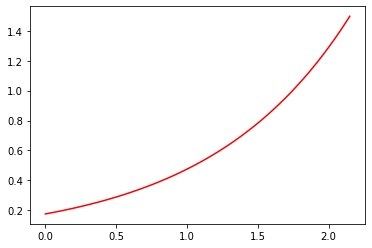

In [36]:
r0 = [np.pi/18,0.,0.]
t = np.linspace(0,2.15,100)
theta, theta_p, theta_pp = Euler2(System,r0,t) #en radianes
plt.plot(t,theta,color='r')
plt.show()

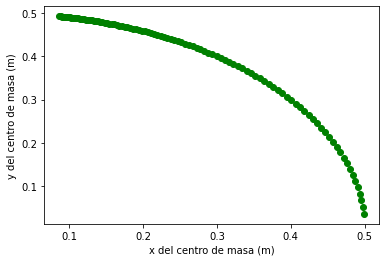

In [37]:
x=0.5*np.sin(theta)
y=0.5*np.cos(theta)
plt.scatter(x,y,color='g',label='Posición de la barra')
plt.xlabel('x del centro de masa (m)')
plt.ylabel('y del centro de masa (m)')
plt.show()

In [38]:
r1 = [np.pi/18,0.,0.]
t1 = np.linspace(0,5,100)
theta1, theta_p1, theta_pp1 = Euler2(System,r1,t1) #en radianes

0.050505050505050504


In [50]:
tiempo  = 0
angulo = 0
for i in range(len(theta1)):
    if (theta1[i] < np.pi/2 + 0.1) and (theta1[i] > np.pi/2 - 0.1):
        tiempo = t1[i]
        angulo = theta1[i]

tiempo, angulo

(2.2222222222222223, 1.6090930334065883)

In [52]:
print("El tiempo que se toma en caer al suelo es:",tiempo, "s")

El tiempo que se toma en caer al suelo es: 2.2222222222222223 s
